In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
np.set_printoptions(suppress = True)

In [3]:
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

# **1. 데이터 불러오기**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 현재 데이터는 댐별로(지역별로) 구분하여 4개의 그룹으로 나눠져 있는 상태
  - group 1: 군위, 김천부항, 남강, 밀양, 보령, 보현산, 부안, 성덕, 영주, 장흥, 주암(조), 횡성
  - group 2 소양강, 충주
  - group 3: 섬진강, 용담, 임하, 주암(본), 합천
  - group 4: 대청, 안동

In [5]:
# 파일 저장 경로 설정
save_path = '/content/drive/MyDrive/2023년 K-water 대국민 물 빅데이터 분석과제 공모전/final/regression/data'

In [6]:
# 데이터 파일 경로 저장
train_files = [os.path.join(save_path, f'train_group{i}.csv') for i in range(1, 5)]
test_files = [os.path.join(save_path, f'test_group{i}.csv') for i in range(1, 5)]

# 각 파일을 데이터프레임 형태로 불러오기
train_groups = [pd.read_csv(file) for file in train_files]
test_groups = [pd.read_csv(file) for file in test_files]

In [7]:
train_groups[0].head(3)

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,...,dam_nm_주암(조),dam_nm_횡성,year_2019,year_2020,year_2021,year_2022,season_autumn,season_spring,season_summer,season_winter
0,0.000000,0.000000,0.732368,3.022033,0.401,48.7,40.1,5.5,40.1,0.441,...,0,0,1,0,0,0,0,0,1,0
1,0.000000,0.094401,0.926241,3.418644,0.606,48.7,40.1,5.5,40.1,0.479,...,0,0,0,1,0,0,1,0,0,0
2,2.847029,0.304539,0.569849,3.145358,0.456,48.7,40.1,5.5,40.1,0.665,...,0,0,0,0,1,0,0,1,0,0


In [8]:
test_groups[0].head(3)

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,...,dam_nm_주암(조),dam_nm_횡성,year_2019,year_2020,year_2021,year_2022,season_autumn,season_spring,season_summer,season_winter
0,0.996838,0.189794,0.863312,27.9460,0.574,48.7,40.1,5.5,40.1,0.761,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.169743,0.832039,17.7640,0.365,48.7,40.1,5.5,40.1,0.650,...,0,0,1,0,0,0,0,0,1,0
2,0.000000,0.000000,0.214305,14.6331,0.301,48.7,40.1,5.5,40.1,0.744,...,0,0,0,0,0,1,1,0,0,0


- 데이터가 제대로 불러와 진 것을 확인할 수 있다.

In [9]:
train_groups[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13477 entries, 0 to 13476
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rain_qy         13477 non-null  float64
 1   inflow_qy       13477 non-null  float64
 2   outflow_qy      13477 non-null  float64
 3   reserve_qy      13477 non-null  float64
 4   reserve_rt      13477 non-null  float64
 5   tot_qy          13477 non-null  float64
 6   valid_qy        13477 non-null  float64
 7   unused_qy       13477 non-null  float64
 8   maximum_use_qy  13477 non-null  float64
 9   avg_hmd         13477 non-null  float64
 10  avg_tmr         13477 non-null  float64
 11  avg_wv          13477 non-null  float64
 12  sun_sum         13477 non-null  float64
 13  dam_nm_군위       13477 non-null  int64  
 14  dam_nm_김천부항     13477 non-null  int64  
 15  dam_nm_남강       13477 non-null  int64  
 16  dam_nm_밀양       13477 non-null  int64  
 17  dam_nm_보령       13477 non-null 

### **✅ Data Description**
1. rain_qy: 강우량
2. inflow_qy: (물의) 유입량
3. outflow_qy: (물의) 방류량
4. reserve_qy: (현재) 저수량 (**target** 변수)
5. reserve_rt: 저수율(저수량 / 총저수량)
6. tot_qy: 총저수량
7. valid_qy: 유효저수량
8. unused_qy: 비활용용량
9. maximum_use_qy: (최대) 이수용량
10. avg_hmd: 평균습도
11. avg_tmr: 평균온도
12. avg_wv: 평균풍속
13. sun_sum: 합계일사량
14. dam_nm_OO: 댐이름(범주형 변수)
15. year_OO: 연도(범주형 변수)
16. season_OO: 계절(범주형 변수)

# **2. 평가 지표**
**1) RMSE(Rooted Mean Square Error)**  
- 회귀 모델의 성능을 평가하는 지표 중 하나로, 예측된 값과 실제 값 사이의 오차를 측정
  - 오차를 제곱하여 평균을 구한 뒤 다시 제곱근을 취한 값으로 계산
- 수식  
  $RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$  
  - N: 총 데이터 포인트의 개수
  - y_i: 실제 값(observed)
  - y_hat: 예측된 값(fitted)
- 예측 오차가 클수록 더 큰 패널티를 받음
  - RMSE가 작을수록 모델의 예측이 더 정확하다고 판단할 수 있음


**2) Adjusted R-Sqaure(수정 결정계수)**    
- R-Square(결정계수)
  - 모형의 설명력을 의미
  - 회귀식을 통해 얻어진 예측값(fitted)이 실제 y값(observed)을 얼마나 잘 설명하는지를 의미
- 결정계수는 독립변수의 유의성과 무관하게 독립변수의 개수에 비례하여 높아진다는 단점이 존재
  - 이러한 결정계수의 단점을 보완하기 위해 수정 결정 계수 활용
  - 실제로 유의미한 예측 변수가 모델에 포함되었을 때만 R-squared가 증가하도록 합
  - 보통 결정계수에 비해 조금 더 작은 값으로 산출됨
  - 수식  
  $Adjusted\ R^2 = 1 - \frac{(1 - R^2) \times (n - 1)}{(n - k - 1)}$  
    - n: 총 데이터 포인트의 개수
    - k: 모델에 포함된 독립 변수의 개수
    - R^2: R-Square 값



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# **3. 모델별 성능 확인을 위한 함수**

In [11]:
colors = [
    'khaki', 'teal', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'rosybrown',
    'deeppink', 'salmon', 'olivedrab', 'olive', 'forestgreen',
    'royalblue', 'mediumpurple', 'gold', 'seagreen',
    'turquoise', 'steelblue', 'slategray', 'peru', 'slateblue', 'cadetblue',
    'lime', 'lavender', 'lightcoral', 'lightseagreen', 'lightskyblue', 'lightgreen',
    'lightpink', 'lightsalmon', 'lightsteelblue', 'lightyellow', 'palegreen',
]

In [12]:
## 회귀곡선 시각화
# 예측값, 실제값을 산점도로 표현

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(10, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='b')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [13]:
# 평가 지표 시각화

def model_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    rmse = np.sqrt(mean_squared_error(pred, actual))

    n = len(actual)  # 데이터 개수
    p = X_train.shape[1]  # 변수의 개수
    r2 = r2_score(actual, pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    my_predictions[name_] = {'rmse': rmse, 'Adjusted R_2': adjusted_r2}

    # 데이터프레임 생성
    df = pd.DataFrame(my_predictions).T
    df['model'] = df.index
    df = df.sort_values(by=['rmse', 'Adjusted R_2'], ascending=[True, False])

    # 상한, 하한 설정
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['rmse'])

    for i, v in enumerate(df['rmse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('RMSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

    print()
    print(df)

In [14]:
# 모델의 중요도 상위 5개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
    ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]
    return ftr_top5

def visualize_ftr_importances(model):
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.tight_layout()

    ftr_top5 = get_top_features(model)
    ax.set_title(model.__class__.__name__ + ' Feature Importances', size=15)

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(12)

    sns.barplot(x=ftr_top5.values, y=ftr_top5.index, ax=ax)

# **4. 모델링**

## **🌊 Group 2**

In [ ]:
group2_tr = train_groups[1]
group2_te = test_groups[1]

In [ ]:
group2_tr.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,...,dam_nm_소양강,dam_nm_충주,year_2019,year_2020,year_2021,year_2022,season_autumn,season_spring,season_summer,season_winter
count,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,...,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000,2241.000000
mean,0.529582,3.617504,4.232899,1616.782075,0.571687,2824.765730,1844.326640,622.915663,1830.548416,0.688340,...,0.498438,0.501562,0.239179,0.257474,0.251673,0.251673,0.253012,0.247657,0.251227,0.248104
std,0.999326,1.309580,0.774461,278.913606,0.095313,75.016373,55.512116,27.005894,78.812223,0.133449,...,0.500109,0.500109,0.426677,0.437340,0.434071,0.434071,0.434835,0.431748,0.433816,0.432009
min,0.000000,0.000000,2.498152,848.952100,0.308700,2750.000000,1789.000000,596.000000,1538.000000,0.316000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.820843,3.835854,1460.897600,0.516000,2750.000000,1789.000000,596.000000,1789.000000,0.589000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.561529,4.262793,1639.560000,0.575000,2750.000000,1789.000000,596.000000,1789.000000,0.703000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.531980,4.370662,4.457111,1811.398400,0.638000,2900.000000,1900.000000,650.000000,1900.000000,0.788000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,4.921199,8.380398,8.284316,2416.721000,0.833000,2900.000000,1900.000000,650.000000,1900.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **1) 랜덤 포레스트(RandomForestRegressor)**

#### **a. Base Model**

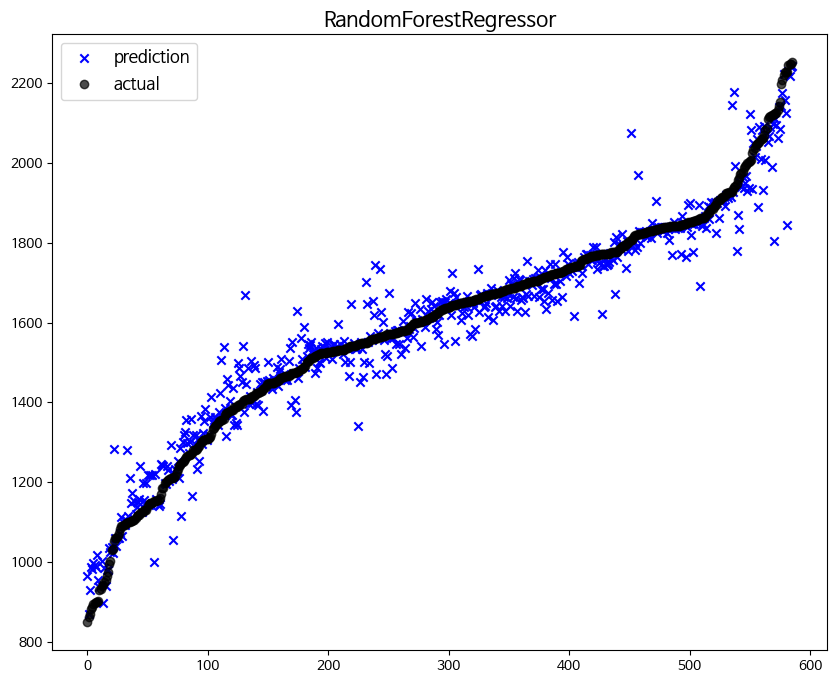

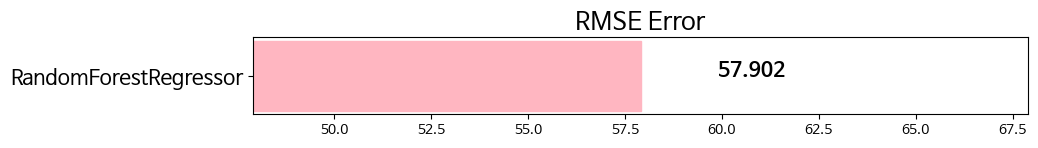


                       Adjusted R_2       rmse                  model
RandomForestRegressor      0.957065  57.902202  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base2 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
rf_base2.fit(X_train, y_train)

# 모델 예측
rf_pred2 = rf_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', rf_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features':[None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model2 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


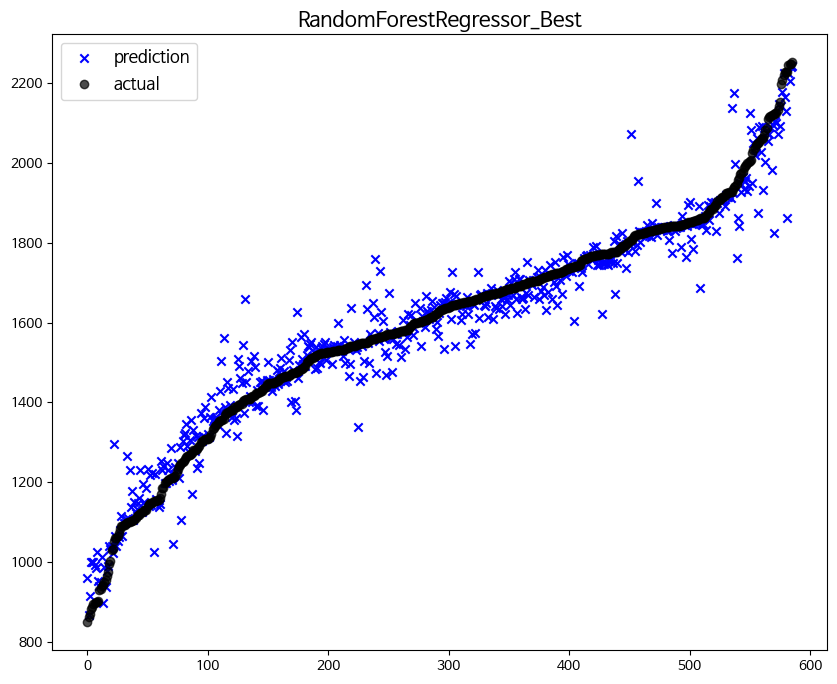

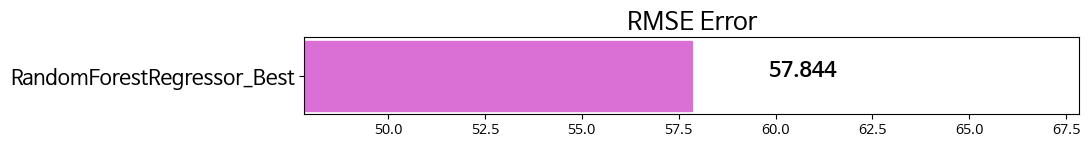


                            Adjusted R_2       rmse  \
RandomForestRegressor_Best      0.957151  57.843919   

                                                 model  
RandomForestRegressor_Best  RandomForestRegressor_Best  


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
rf_best_model2.fit(X_train, y_train)

# 모델 예측
rf_pred2 = rf_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_Best', rf_pred2, y_test)

### **2) CatBoostRegressor**

#### **a. Base Model**

In [ ]:
# !pip install catboost

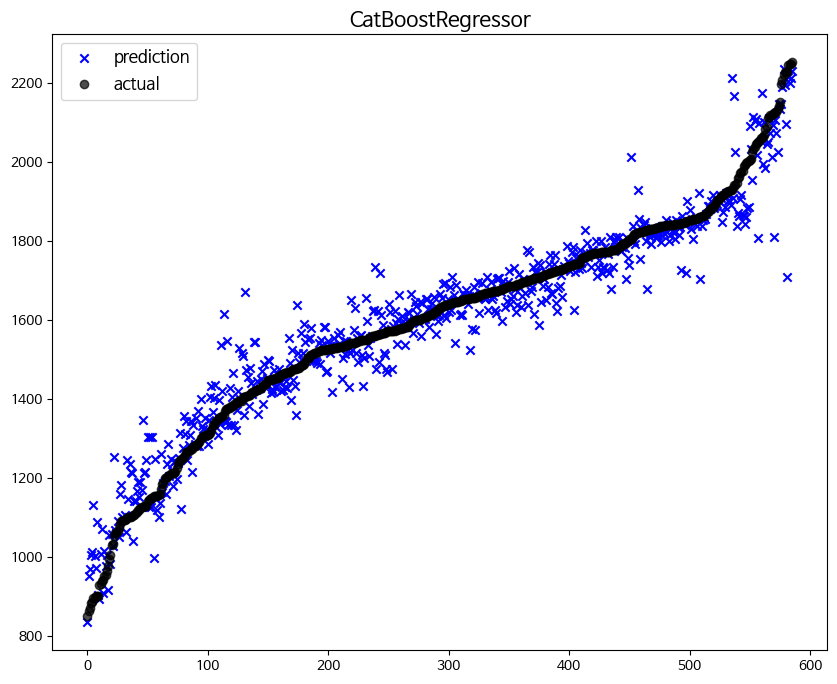

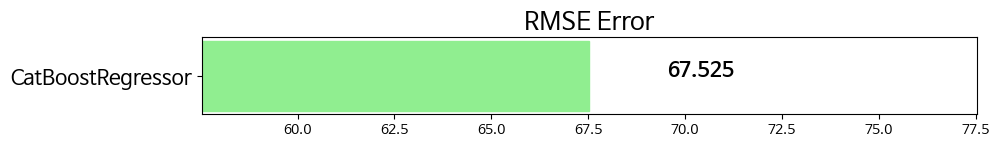


                   Adjusted R_2       rmse              model
CatBoostRegressor      0.941609  67.524555  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base2 = CatBoostRegressor(random_seed = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
catboost_base2.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred2 = catboost_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', catboost_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [4, 6, 8],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [500, 1000],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model2 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 200, 'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


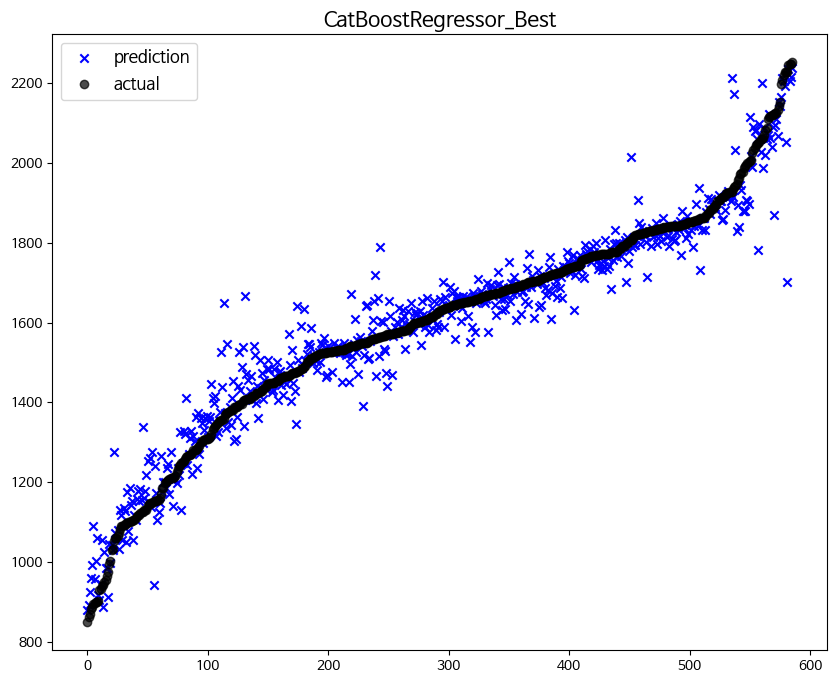

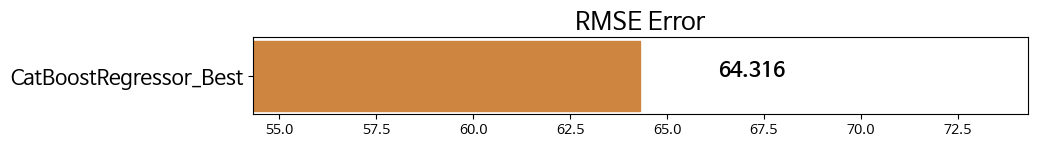


                        Adjusted R_2       rmse                   model
CatBoostRegressor_Best      0.947026  64.316039  CatBoostRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
catboost_best_model2.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred2 = catboost_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_Best', catboost_pred2, y_test)

### **3) XGBRegressor**

#### **a. Base Model**

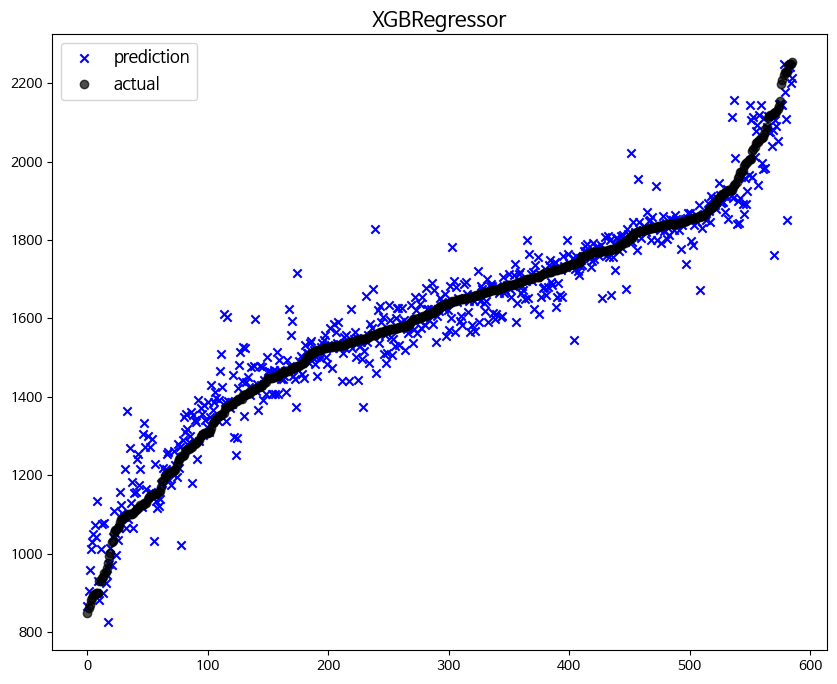

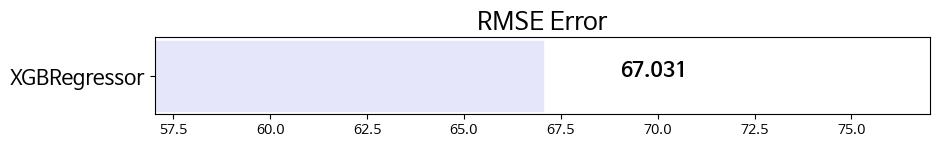


              Adjusted R_2       rmse         model
XGBRegressor      0.942459  67.031291  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base2 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
xgb_base2.fit(X_train, y_train, verbose=0)

# 모델 예측
xgb_pred2 = xgb_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor', xgb_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [None, 3, 4], # 트리의 최대 깊이
    'n_estimators': [100, 200, 300], # 트리의 수, 반복 횟수
    'subsample': [None, 0.8, 1.0], # 각 트리를 학습시킬 때 사용할 샘플의 비율
    'colsample_bytree': [None, 0.8, 1.0] # 각 트리를 학습시킬 때 사용할 피처의 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model2 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 300, 'subsample': 0.8}


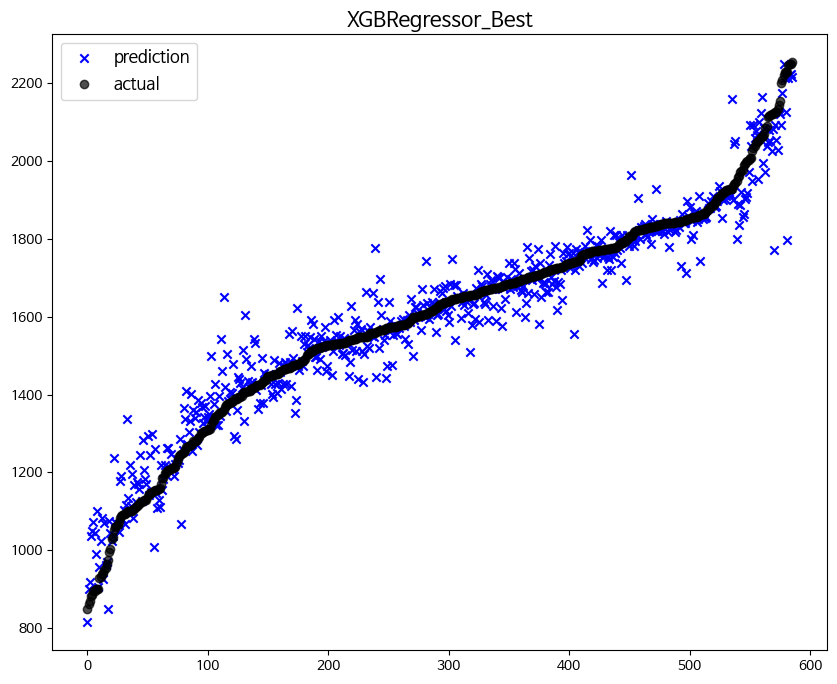

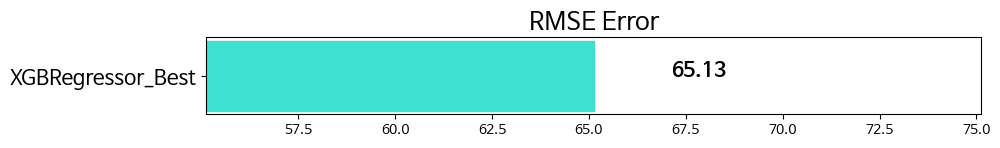


                   Adjusted R_2      rmse              model
XGBRegressor_Best      0.945676  65.13008  XGBRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
xgb_best_model2.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred2 = xgb_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor_Best', xgb_pred2, y_test)

### **4) ExtraTreesRegressor**

#### **a. Base Model**

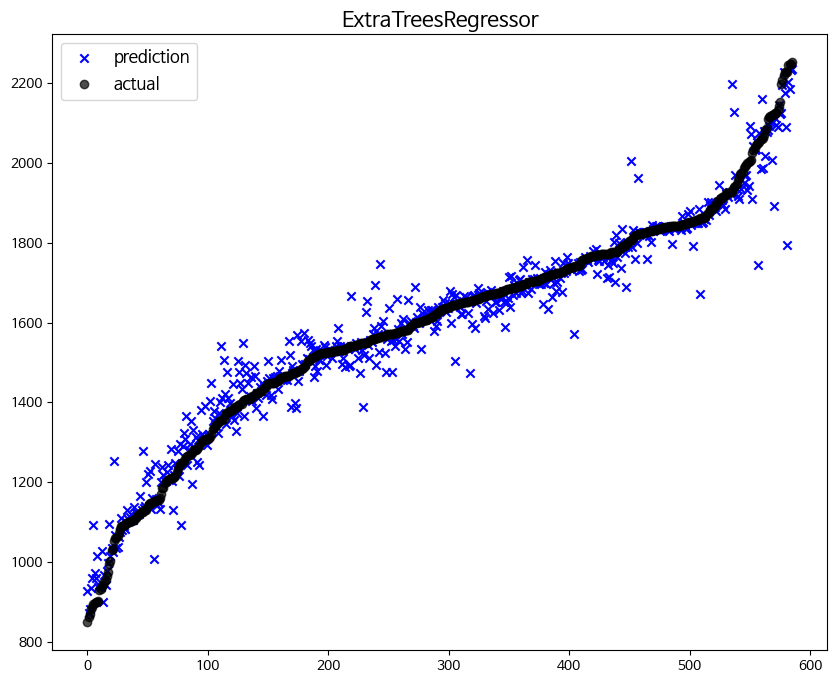

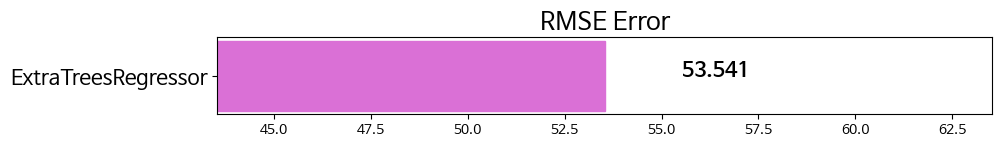


                     Adjusted R_2       rmse                model
ExtraTreesRegressor      0.963289  53.541025  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base2 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
et_base2.fit(X_train, y_train)

# 모델 예측
et_pred2 = et_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', et_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],         # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],             # 트리의 최대 깊이
    'min_samples_split': [1, 2, 4],         # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'] # 노드에서 고려할 최대 피처 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model2 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


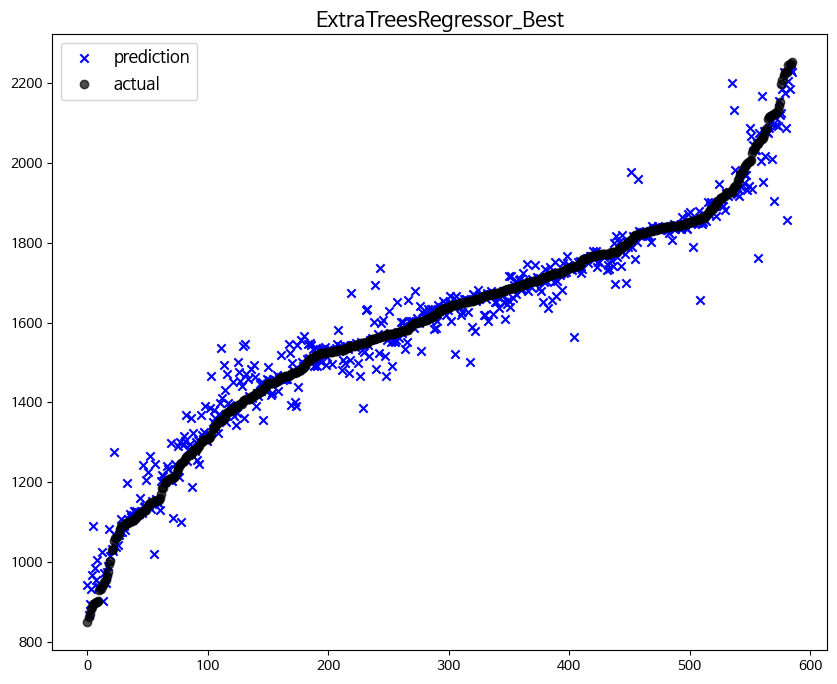

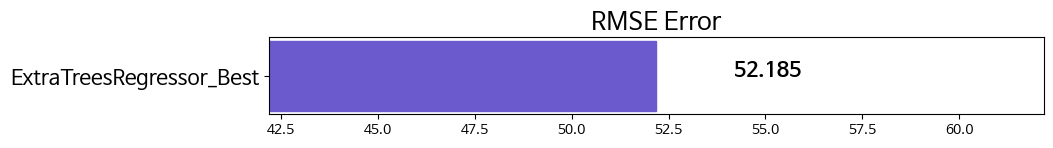


                          Adjusted R_2       rmse                     model
ExtraTreesRegressor_Best      0.965125  52.184729  ExtraTreesRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
et_best_model2.fit(X_train, y_train)

# 모델 예측
et_pred2 = et_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', et_pred2, y_test)

### **5) LGBMRegressor**

#### **a. Base Model**

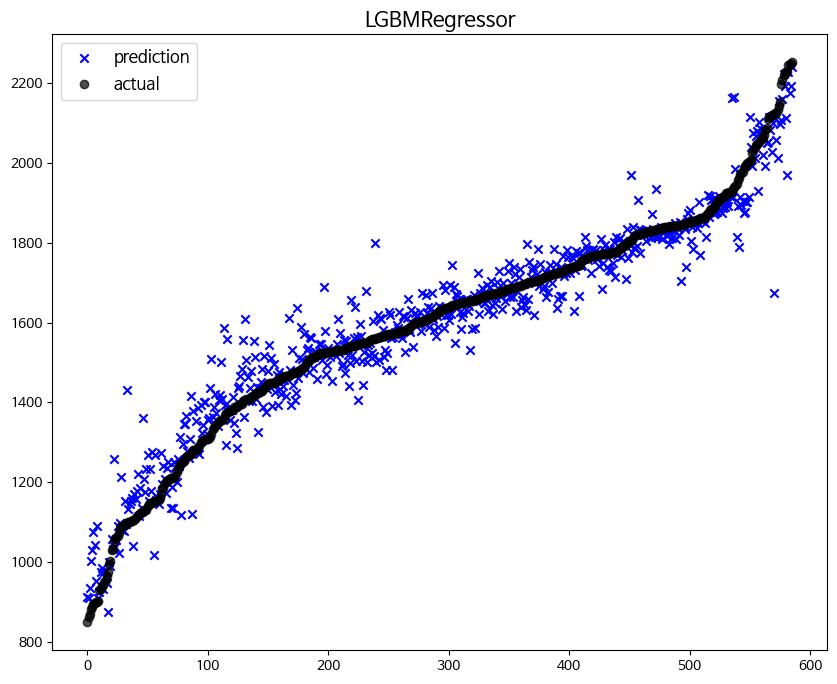

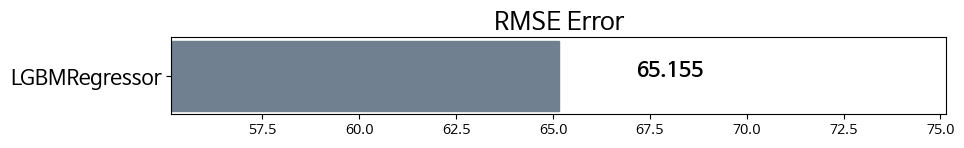


               Adjusted R_2       rmse          model
LGBMRegressor      0.945635  65.154903  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base2 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
lgbm_base2.fit(X_train, y_train)

# 모델 예측
lgbm_pred2 = lgbm_base2.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', lgbm_pred2, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model2 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 300, 'subsample': 0.8}


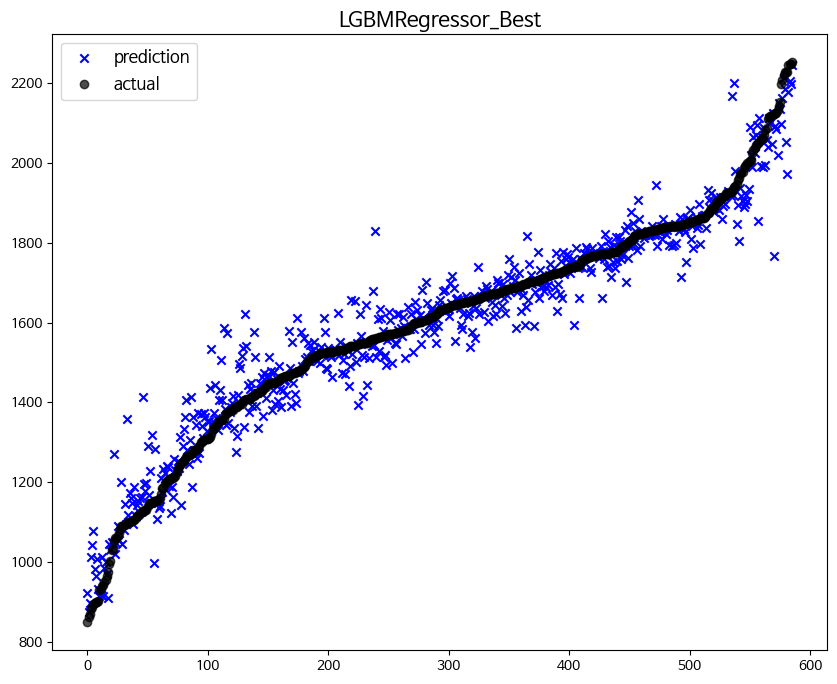

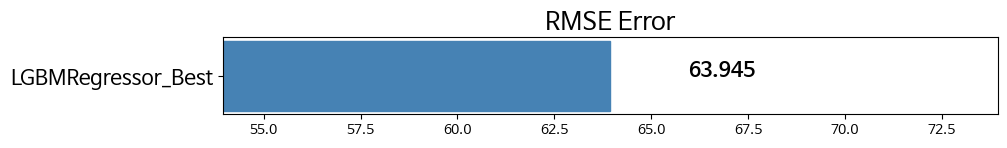


                    Adjusted R_2       rmse               model
LGBMRegressor_Best      0.947635  63.945197  LGBMRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

# 모델 학습
lgbm_best_model2.fit(X_train, y_train)

# 모델 예측
lgbm_pred2 = lgbm_best_model2.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', lgbm_pred2, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|57.844|0.9572|
|CatBoostRegressor|64.316|0.9470|
|XGBRegressor|65.130|0.9457|
|ExtraTreesRegressor|52.185|0.9651|
|LGBMRegressor|63.945|0.9476|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [ ]:
# feature, target 분리
X_train = group2_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group2_tr['reserve_qy']

X_test = group2_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group2_te['reserve_qy']

best_model2 = ExtraTreesRegressor(max_depth = 20, max_features = 'auto', min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 200,
                                  n_jobs = -1, random_state = 42)

# 모델 학습
best_model2.fit(X_train, y_train)

# 모델 예측
y_pred2 = best_model2.predict(X_test)

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [ ]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df2 = pd.DataFrame(y_pred2, columns = ['reserve_qy_pred'])
df2.head(3)

,reserve_qy_pred
0,1619.819875
1,1540.382760
2,2032.781782


In [ ]:
# 필요한 변수와 결합

df2 = pd.concat([df2, group2_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df2.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy
0,1619.819875,650.0,1750.0
1,1540.382760,650.0,1900.0
2,2032.781782,650.0,1900.0


In [ ]:
# 활용 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df2['usable_qy'] = df2.apply(calculate_usable_qy, axis = 1)

In [ ]:
df2.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy
0,1619.819875,650.0,1750.0,969.819875
1,1540.382760,650.0,1900.0,890.382760
2,2032.781782,650.0,1900.0,1382.781782


In [ ]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df2['efficiency'] = df2['usable_qy'] / df2['maximum_use_qy']
df2.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy,efficiency
0,1619.819875,650.0,1750.0,969.819875,0.554183
1,1540.382760,650.0,1900.0,890.382760,0.468623
2,2032.781782,650.0,1900.0,1382.781782,0.727780


In [ ]:
df2.describe()

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy,efficiency
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,1595.394753,623.000000,1834.919795,972.394753,0.529665
std,271.766262,27.023067,72.856389,263.030821,0.141347
min,867.555630,596.000000,1538.000000,271.555630,0.151792
25%,1456.447408,596.000000,1789.000000,817.271884,0.442426
50%,1628.389802,623.000000,1789.000000,988.600826,0.537144
75%,1770.086955,650.000000,1900.000000,1164.938812,0.632296
max,2233.614648,650.000000,1900.000000,1583.614648,0.838919


- (최대) 이수용량에 비해 이수목적을 위해 저장되는 물의 양이 다소 적음을 확인할 수 있다.
(대부분 50% 이하)
- 따라서, 효율적인 이수를 위한 저수량 확보에 노력을 기울여야 하는 지역이다.

## **🌊 Group 4**

In [16]:
group4_tr = train_groups[3]
group4_te = test_groups[3]

In [17]:
group4_tr.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,tot_qy,valid_qy,unused_qy,maximum_use_qy,avg_hmd,...,dam_nm_대청,dam_nm_안동,year_2019,year_2020,year_2021,year_2022,season_autumn,season_spring,season_summer,season_winter
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,...,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,0.483703,2.884908,3.491700,901.754293,0.658952,1369.969724,894.158504,349.809439,890.338379,0.627909,...,0.504007,0.495993,0.236420,0.256011,0.252004,0.255565,0.256011,0.249332,0.244435,0.250223
std,0.975172,1.255794,0.777594,134.619268,0.087435,121.023059,105.020010,101.019248,103.082433,0.143012,...,0.500095,0.500095,0.424978,0.436525,0.434260,0.436276,0.436525,0.432723,0.429847,0.433238
min,0.000000,0.000000,0.000000,519.211700,0.416000,1248.000000,790.000000,248.000000,790.000000,0.235000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.226514,3.167267,821.478000,0.605000,1248.000000,790.000000,248.000000,790.000000,0.525000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.890816,3.469619,912.323150,0.661000,1490.000000,790.000000,450.000000,790.000000,0.638500,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.301400,3.475299,3.749762,997.394000,0.719000,1490.000000,1000.000000,450.000000,1000.000000,0.733750,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000
max,4.433372,8.431923,8.094113,1304.602000,0.876000,1490.000000,1000.000000,450.000000,1000.000000,0.965000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **1) 랜덤 포레스트(RandomForestRegressor)**

#### **a. Base Model**

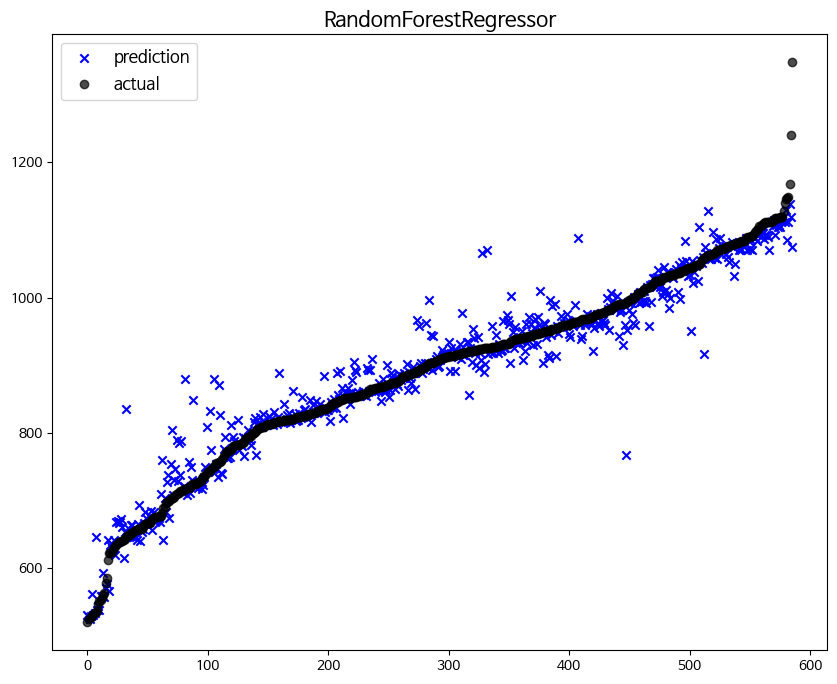

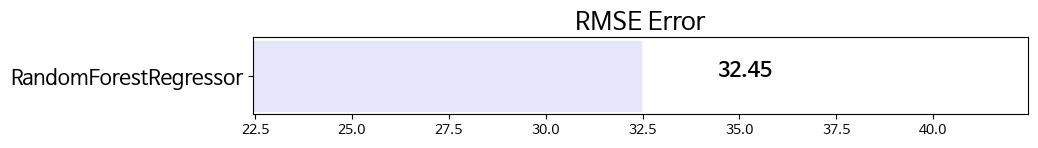


                       Adjusted R_2       rmse                  model
RandomForestRegressor      0.946123  32.450436  RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 기본 모델 생성
rf_base4 = RandomForestRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
rf_base4.fit(X_train, y_train)

# 모델 예측
rf_pred4 = rf_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor', rf_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 트리 개수
    'max_depth': [None, 10, 20],     # 최대 깊이(None은 제한 없음을 의미)
    'min_samples_split': [2, 3, 4], # 노드 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 3],   # 리프 노드를 위한 최소 샘플 수
    'max_features':[None, 1, 2] # 트리 분할 시 사용할 최대 특성의 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

rf_base = RandomForestRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
rf_grid_search = GridSearchCV(rf_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
rf_grid_search.fit(X_train, y_train)

# 최적 모델 저장
rf_best_model4 = rf_grid_search.best_estimator_

print("최적 파라미터 조합:", rf_grid_search.best_params_)

최적 파라미터 조합: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


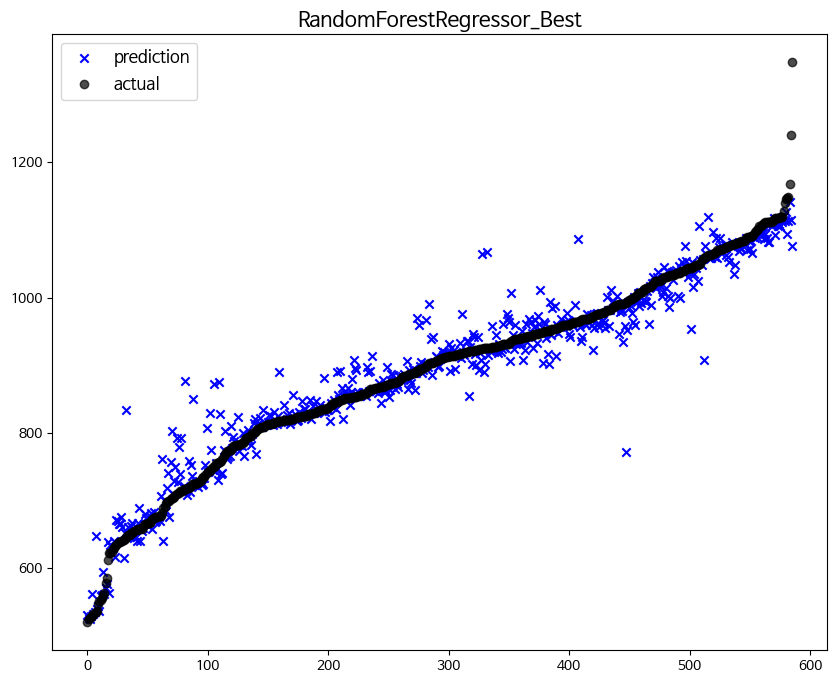

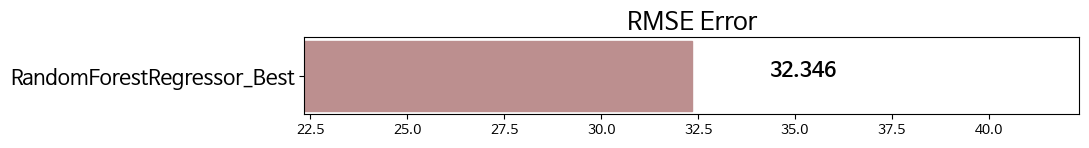


                            Adjusted R_2       rmse  \
RandomForestRegressor_Best      0.946468  32.346389   

                                                 model  
RandomForestRegressor_Best  RandomForestRegressor_Best  


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
rf_best_model4.fit(X_train, y_train)

# 모델 예측
rf_pred4 = rf_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('RandomForestRegressor_Best', rf_pred4, y_test)

### **2) CatBoostRegressor**

#### **a. Base Model**

In [ ]:
# !pip install catboost

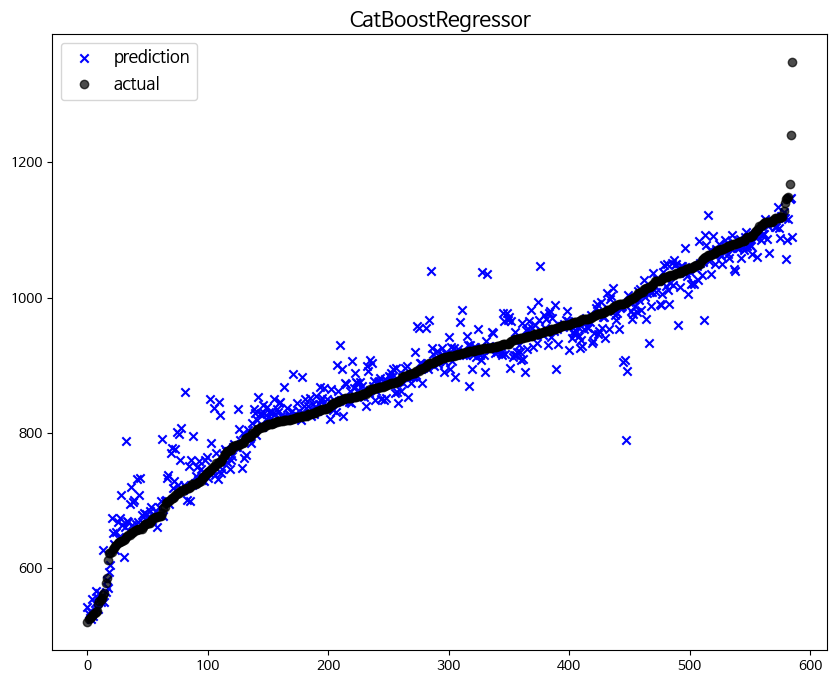

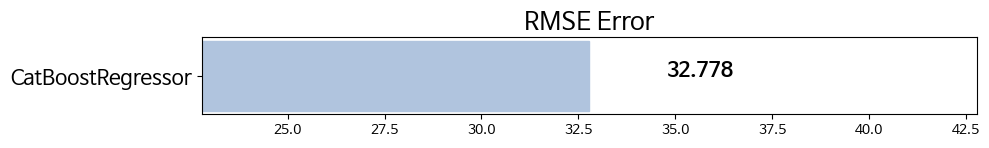


                   Adjusted R_2       rmse              model
CatBoostRegressor       0.94503  32.778134  CatBoostRegressor


In [ ]:
from catboost import CatBoostRegressor

# 기본 모델 생성
catboost_base4 = CatBoostRegressor(random_seed = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
catboost_base4.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred4 = catboost_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor', catboost_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'border_count': [200, 254, 300],  # 결정 경계(borders)의 수, 트리 노드 분할에 사용
    'depth': [4, 6, 8],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'iterations': [500, 1000],  # 반복 횟수, 학습 과정에서 사용되는 트리의 수
    'l2_leaf_reg': [1, 3, 5],  # L2 정규화의 강도, 모델의 과적합을 제어
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

catboost_base = CatBoostRegressor(random_seed = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
catboost_grid_search = GridSearchCV(catboost_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
catboost_grid_search.fit(X_train, y_train, verbose = 0)

# 최적 모델 저장
catboost_best_model4 = catboost_grid_search.best_estimator_

print("최적 파라미터 조합:", catboost_grid_search.best_params_)

최적 파라미터 조합: {'border_count': 254, 'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


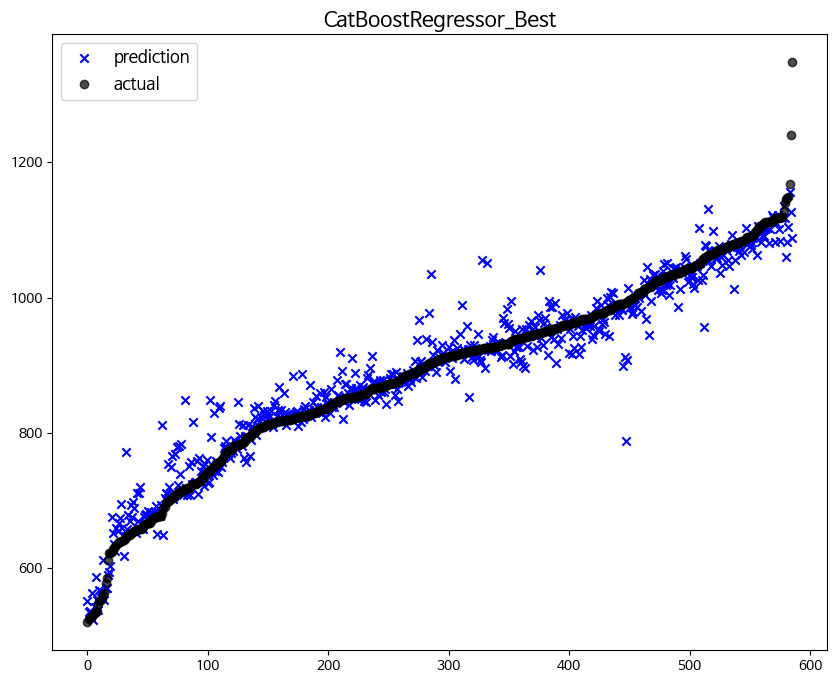

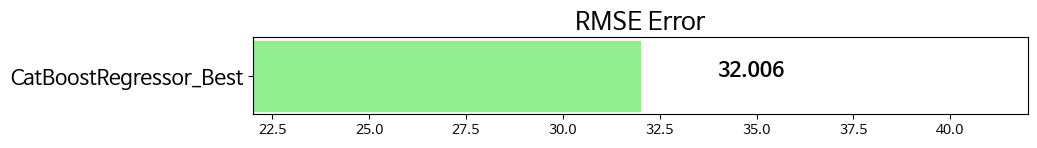


                        Adjusted R_2       rmse                   model
CatBoostRegressor_Best       0.94759  32.005646  CatBoostRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
catboost_best_model4.fit(X_train, y_train, verbose = 0)

# 모델 예측
catboost_pred4 = catboost_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('CatBoostRegressor_Best', catboost_pred4, y_test)

### **3) XGBRegressor**

#### **a. Base Model**

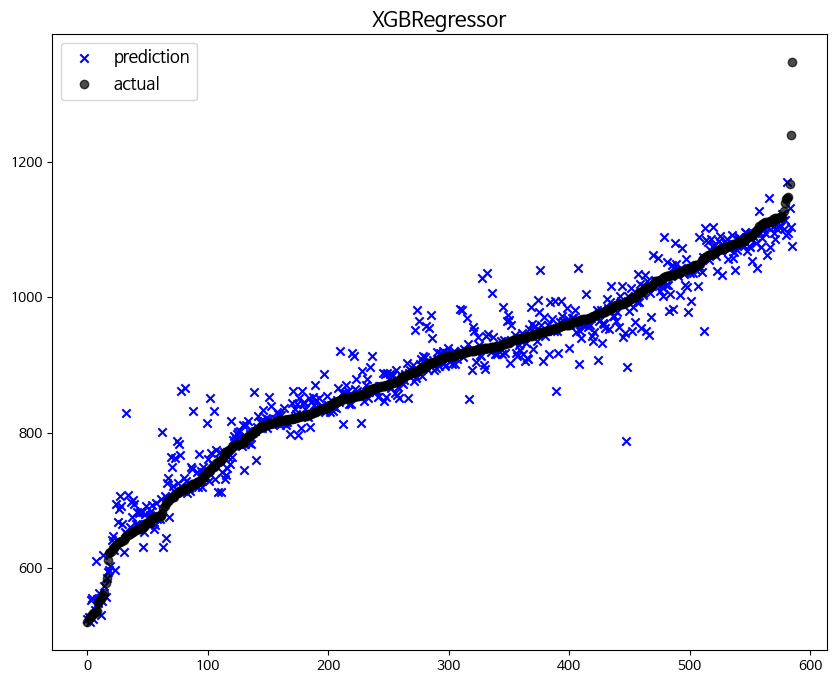

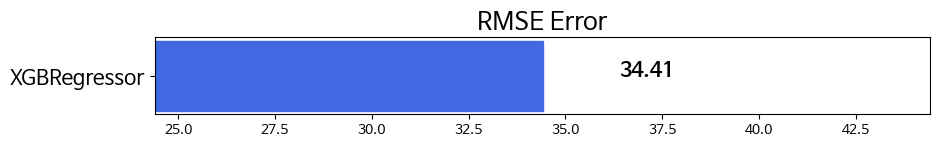


              Adjusted R_2       rmse         model
XGBRegressor       0.93942  34.410047  XGBRegressor


In [ ]:
from xgboost import XGBRegressor

# 기본 모델 생성
xgb_base4 = XGBRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
xgb_base4.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred4 = xgb_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor', xgb_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], # 학습률, 트리에 적용되는 가중치 업데이트의 크기
    'max_depth': [None, 3, 4], # 트리의 최대 깊이
    'n_estimators': [100, 200, 300], # 트리의 수, 반복 횟수
    'subsample': [None, 0.8, 1.0], # 각 트리를 학습시킬 때 사용할 샘플의 비율
    'colsample_bytree': [None, 0.8, 1.0] # 각 트리를 학습시킬 때 사용할 피처의 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

xgb_base = XGBRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
xgb_grid_search = GridSearchCV(xgb_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
xgb_grid_search.fit(X_train, y_train)

# 최적 모델 저장
xgb_best_model4 = xgb_grid_search.best_estimator_

print("최적 파라미터 조합:", xgb_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': None, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 300, 'subsample': 0.8}


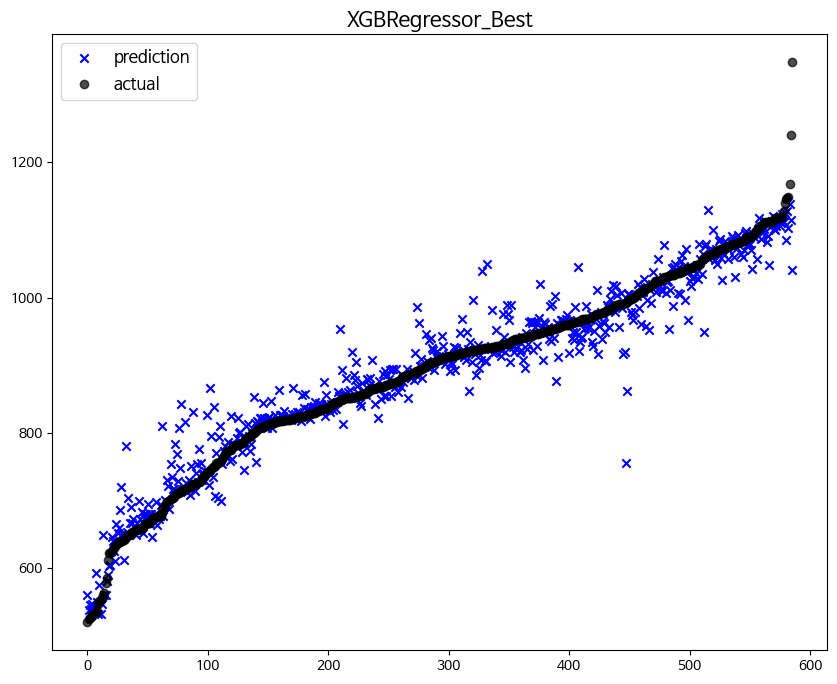

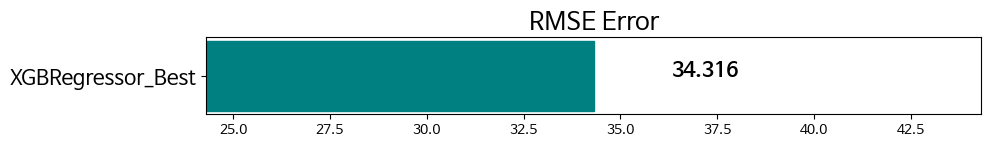


                   Adjusted R_2       rmse              model
XGBRegressor_Best      0.939752  34.315569  XGBRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
xgb_best_model4.fit(X_train, y_train, verbose = 0)

# 모델 예측
xgb_pred4 = xgb_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('XGBRegressor_Best', xgb_pred4, y_test)

### **4) ExtraTreesRegressor**

#### **a. Base Model**

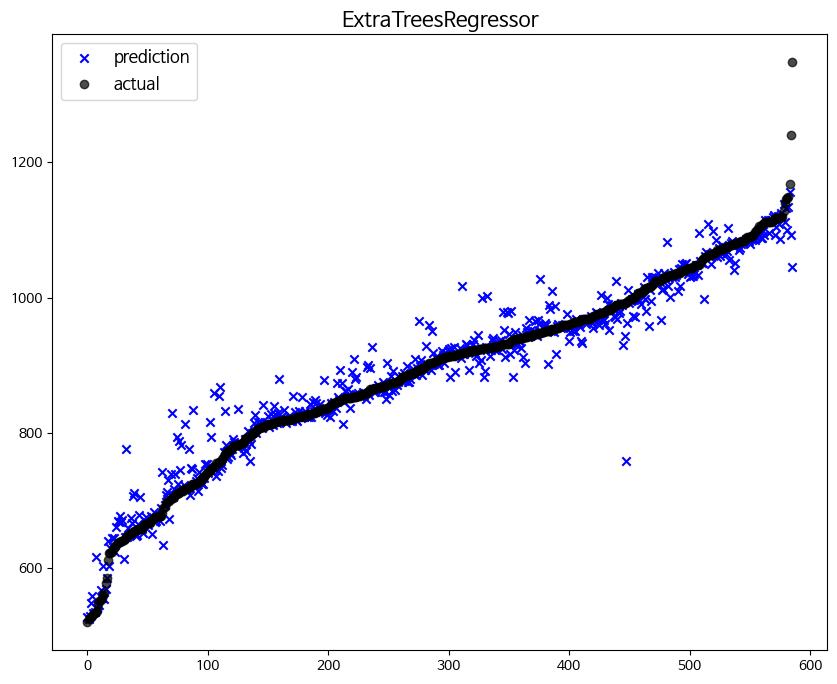

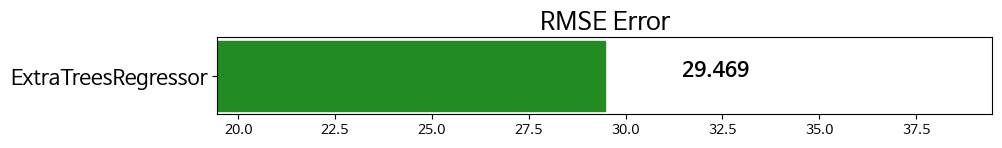


                     Adjusted R_2       rmse                model
ExtraTreesRegressor      0.955568  29.469041  ExtraTreesRegressor


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# 기본 모델 생성
et_base4 = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
et_base4.fit(X_train, y_train)

# 모델 예측
et_pred4 = et_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor', et_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# 하이퍼 파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],         # 트리의 수, 반복 횟수
    'max_depth': [None, 10, 20],             # 트리의 최대 깊이
    'min_samples_split': [1, 2, 4],         # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],           # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt', 1] # 노드에서 고려할 최대 피처 수
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

et_base = ExtraTreesRegressor(n_jobs = -1, random_state = 42)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
et_grid_search = GridSearchCV(et_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE', verbose = 0)
et_grid_search.fit(X_train, y_train)

# 최적 모델 저장
et_best_model4 = et_grid_search.best_estimator_

print("최적 파라미터 조합:", et_grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

최적 파라미터 조합: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


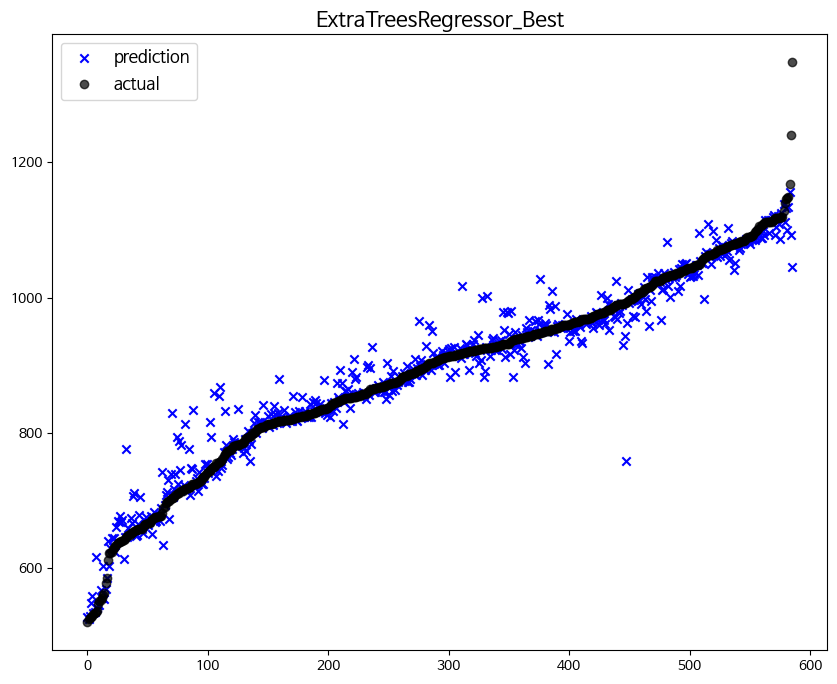

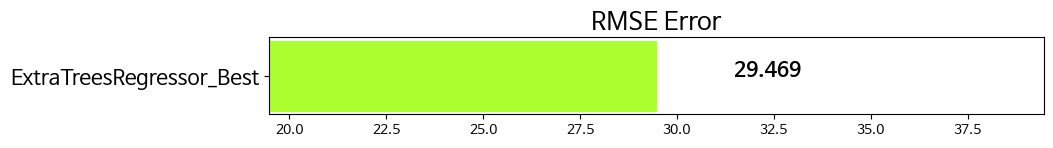


                          Adjusted R_2       rmse                     model
ExtraTreesRegressor_Best      0.955568  29.469041  ExtraTreesRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
et_best_model4.fit(X_train, y_train)

# 모델 예측
et_pred2 = et_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('ExtraTreesRegressor_Best', et_pred4, y_test)

### **5) LGBMRegressor**

#### **a. Base Model**

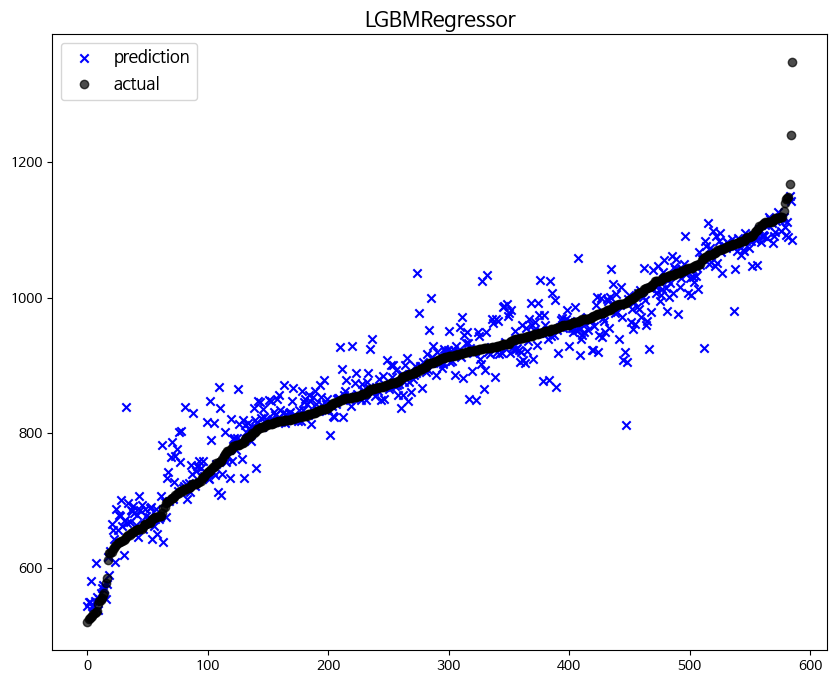

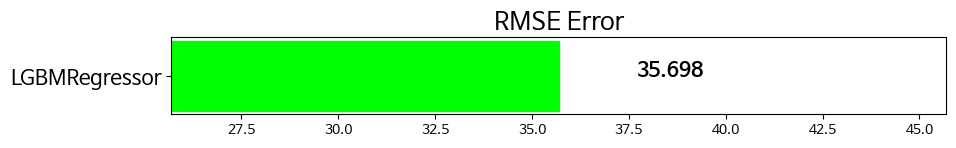


               Adjusted R_2       rmse          model
LGBMRegressor        0.9348  35.698084  LGBMRegressor


In [ ]:
from lightgbm import LGBMRegressor

# 기본 모델 생성
lgbm_base4 = LGBMRegressor(random_state = 42, verbosity=-1)

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
lgbm_base4.fit(X_train, y_train)

# 모델 예측
lgbm_pred4 = lgbm_base4.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor', lgbm_pred4, y_test)

#### **b. 하이퍼 파라미터 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 300, 500],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.5],  # 학습률
    'max_depth': [None, 5, 10],  # 트리의 최대 깊이
    'min_child_samples': [20, 50, 100],  # 각 리프 노드에 필요한 최소 샘플 수
    'subsample': [0.8, 1.0],  # 각 트리에 사용될 데이터 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 각 트리에 사용될 피처 샘플링 비율
}

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 평가 지표 설정
scoring = {
    'RMSE': make_scorer(root_mean_squared_error, greater_is_better = False),
    'Adj_R2': make_scorer(lambda y_true, y_pred: 1 - (1 - r2_score(y_true, y_pred)) * (len(y_true) - 1) / (len(y_true) - X_test.shape[1] - 1))
}

In [ ]:
## 하이퍼 파라미터 튜닝 및 모델 학습

lgbm_base = LGBMRegressor(random_state = 42, verbosity=-1)

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# GridSearchCV를 이용하여 최적 파라미터 탐색
lgbm_grid_search = GridSearchCV(lgbm_base, param_grid, cv = 5, scoring = scoring, refit = 'RMSE')
lgbm_grid_search.fit(X_train, y_train)

# 최적 모델 저장
lgbm_best_model4 = lgbm_grid_search.best_estimator_

print("최적 파라미터 조합:", lgbm_grid_search.best_params_)

최적 파라미터 조합: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'min_child_samples': 20, 'n_estimators': 500, 'subsample': 0.8}


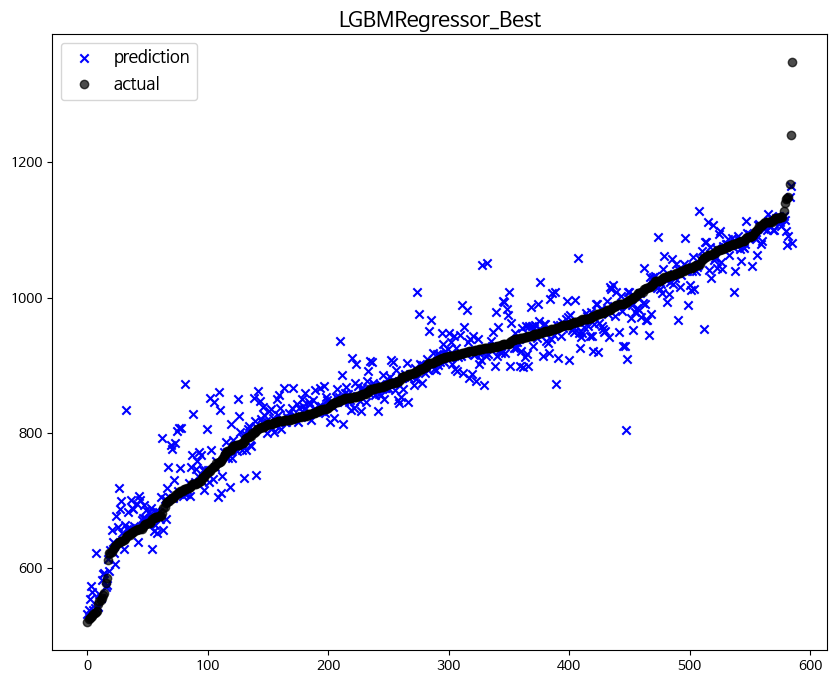

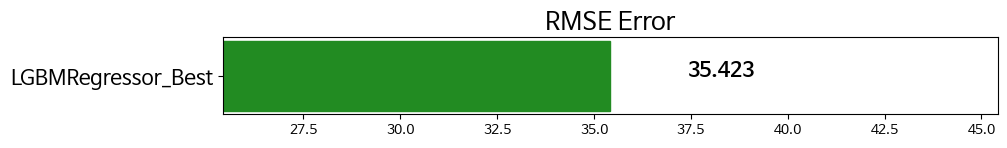


                    Adjusted R_2       rmse               model
LGBMRegressor_Best        0.9358  35.423202  LGBMRegressor_Best


In [ ]:
### 모델 성능 비교
# 각 데이터에 대해 최적 파라미터로 튜닝된 모델로 학습 및 평가

my_predictions = {}  # 결과를 저장할 딕셔너리

# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

# 모델 학습
lgbm_best_model4.fit(X_train, y_train)

# 모델 예측
lgbm_pred4 = lgbm_best_model4.predict(X_test)

# 모델 평가 및 시각화
model_eval('LGBMRegressor_Best', lgbm_pred4, y_test)

### **⏺ 최적 모델로 예측**

- 모델별 성능 비교

|Model|RMSE|Adj R^2|
|-------|----|----|
|RandomForestRegressor|32.346|0.9465|
|CatBoostRegressor|32.006|0.9476|
|XGBRegressor|34.316|0.9398|
|ExtraTreesRegressor|29.469|0.9556|
|LGBMRegressor|35.423|0.9358|

- rmse와 Adjusted R-Square 측면에서 모두 ExtraTreesRegressor의 성능이 가장 좋음을 확인할 수 있다.

In [20]:
# feature, target 분리
X_train = group4_tr.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_train = group4_tr['reserve_qy']

X_test = group4_te.drop(['reserve_qy', 'reserve_rt', 'tot_qy', 'valid_qy', 'unused_qy', 'maximum_use_qy'], axis=1)
y_test = group4_te['reserve_qy']

best_model4 = ExtraTreesRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 200)

# 모델 학습
best_model4.fit(X_train, y_train)

# 모델 예측
y_pred4 = best_model4.predict(X_test)

### **⏺ 활용 능력 계산**
- 현재 댐에 저장되어 있는 물 중 얼만큼을 사용할 수 있을까?

In [21]:
# 현재 저수량 예측값을 DataFrame 형태로 저장

df4 = pd.DataFrame(y_pred4, columns = ['reserve_qy_pred'])
df4.head(3)

,reserve_qy_pred
0,838.061580
1,858.953139
2,967.282541


In [22]:
# 필요한 변수와 결합

df4 = pd.concat([df4, group4_te[['unused_qy', 'maximum_use_qy']]], axis = 1) # 열 방향 결합
df4.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy
0,838.061580,450.0,790.0
1,858.953139,450.0,790.0
2,967.282541,450.0,790.0


In [23]:
# 활용 용량 계산
def calculate_usable_qy(data):
    usable_qy = data['reserve_qy_pred'] - data['unused_qy']
    return min(usable_qy, data['maximum_use_qy']) # (최대) 이수용량을 초과하여 댐의 물을 이용할 수는 없음(관련 기관의 승인 필요)

df4['usable_qy'] = df4.apply(calculate_usable_qy, axis = 1)

In [24]:
df4.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy
0,838.061580,450.0,790.0,388.061580
1,858.953139,450.0,790.0,408.953139
2,967.282541,450.0,790.0,517.282541


In [25]:
# 활용 능력 계산
# (최대) 이수용량과 비교하였을 때 얼만큼의 물을 활용할 수 있는가

df4['efficiency'] = df4['usable_qy'] / df4['maximum_use_qy']
df4.head(3)

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy,efficiency
0,838.061580,450.0,790.0,388.061580,0.491217
1,858.953139,450.0,790.0,408.953139,0.517662
2,967.282541,450.0,790.0,517.282541,0.654788


In [26]:
df4.describe()

,reserve_qy_pred,unused_qy,maximum_use_qy,usable_qy,efficiency
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,893.449384,349.000000,892.372014,544.449384,0.614765
std,130.143344,101.086288,103.796340,112.656235,0.127947
min,532.129302,248.000000,790.000000,270.272429,0.284129
25%,821.050107,248.000000,790.000000,462.705313,0.529946
50%,908.387530,349.000000,840.000000,554.276903,0.621574
75%,985.653022,450.000000,1000.000000,625.974917,0.703431
max,1148.436905,450.000000,1000.000000,826.620195,0.884097


- (최대) 이수용량에 비해 이수목적을 위해 저장되는 물의 양이 상당함을 확인할 수 있다.
  - 전체 기간의 3/4 이상 활용 능력이 50% 이상이다.
- 따라서, 효율적으로 이수 공급이 가능할 것으로 전망되는 지역이다.